# Data visualisation of shadowhand sensors

(560, 255)
(560,)
(238, 255)


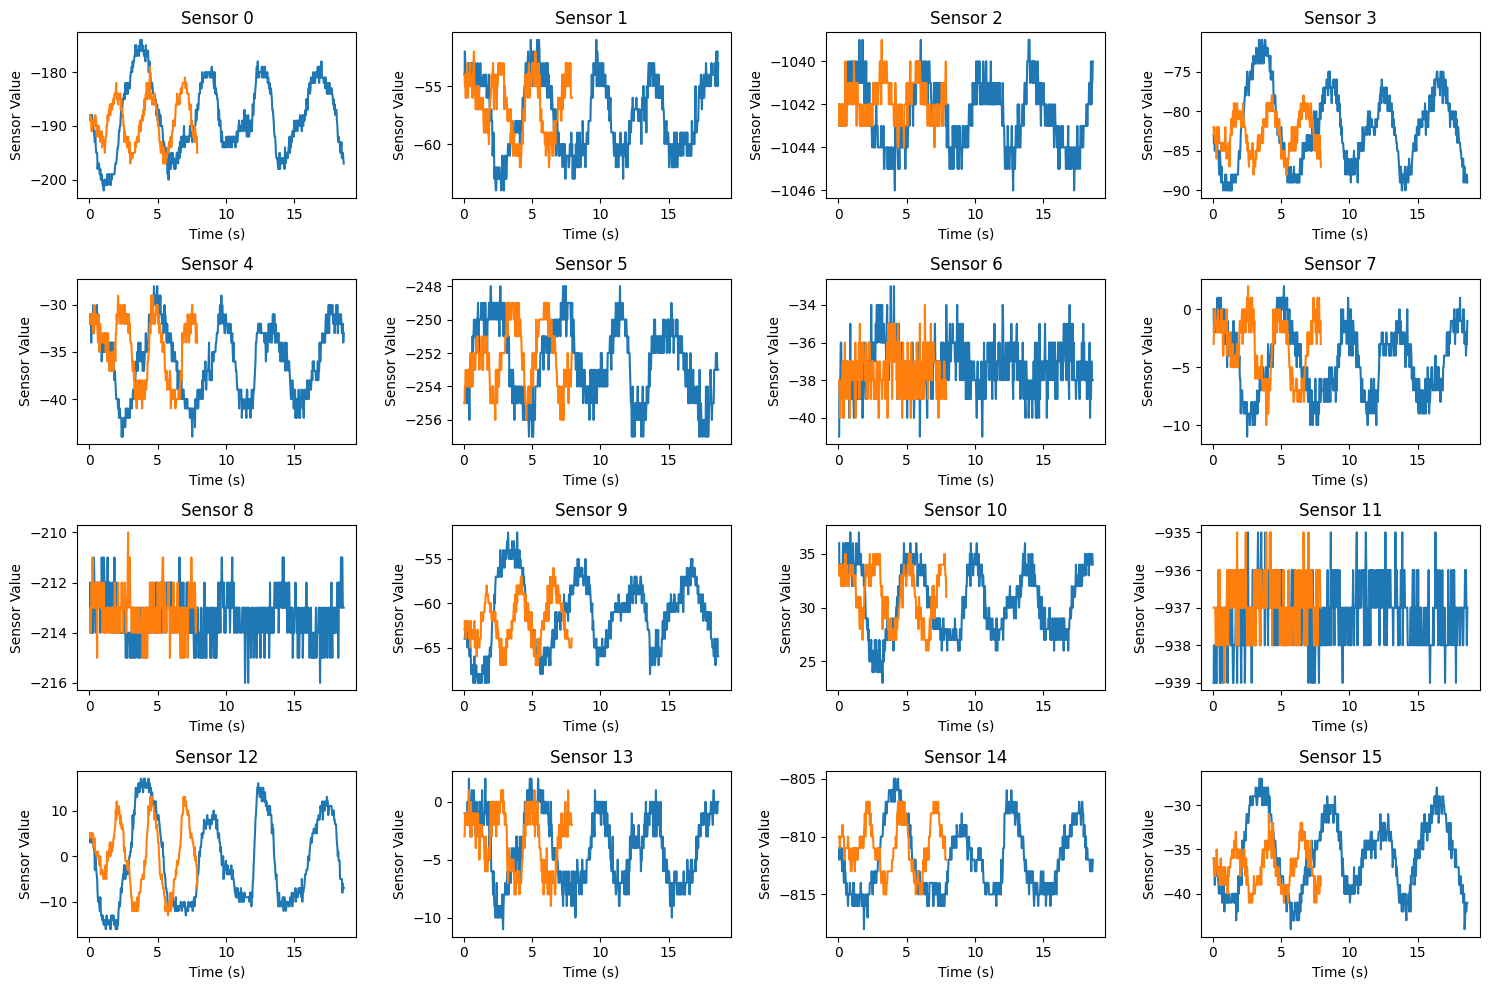

In [1]:
data_path = "G:\\datasets\\tac2Slip"
classes = ['no_slip', 'slip']
import os
import csv
import time
import numpy as np
def import_csv(file_path):
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        #skip header
        next(reader)
        data = []
        for row in reader:
            data.append([float(i) for i in row])
    data = np.array(data, dtype=np.float32)
    time = data[:, 0]
    data = data[:, 1:]
    return time, data

c = 1
i = 0
file_path = os.path.join(data_path, classes[1], f"tactile_data{i:04d}.csv")
time_slip, data_slip = import_csv(file_path)

print(data_slip.shape)
print(time_slip.shape)

file_path = os.path.join(data_path, classes[0], f"tactile_data{i:04d}.csv")
time_no_slip, data_no_slip = import_csv(file_path)
print(data_no_slip.shape)
# --------------------------- Plot first 16 channels across time -------------------------- #
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(15, 10))
for j in range(16):
    ax = axs[j // 4, j % 4]
    ax.plot(time_slip, data_slip[:, j])
    ax.plot(time_no_slip, data_no_slip[:, j])
    ax.set_title(f'Sensor {j}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Sensor Value')
plt.tight_layout()
plt.show()

(560, 51)
(560, 17)


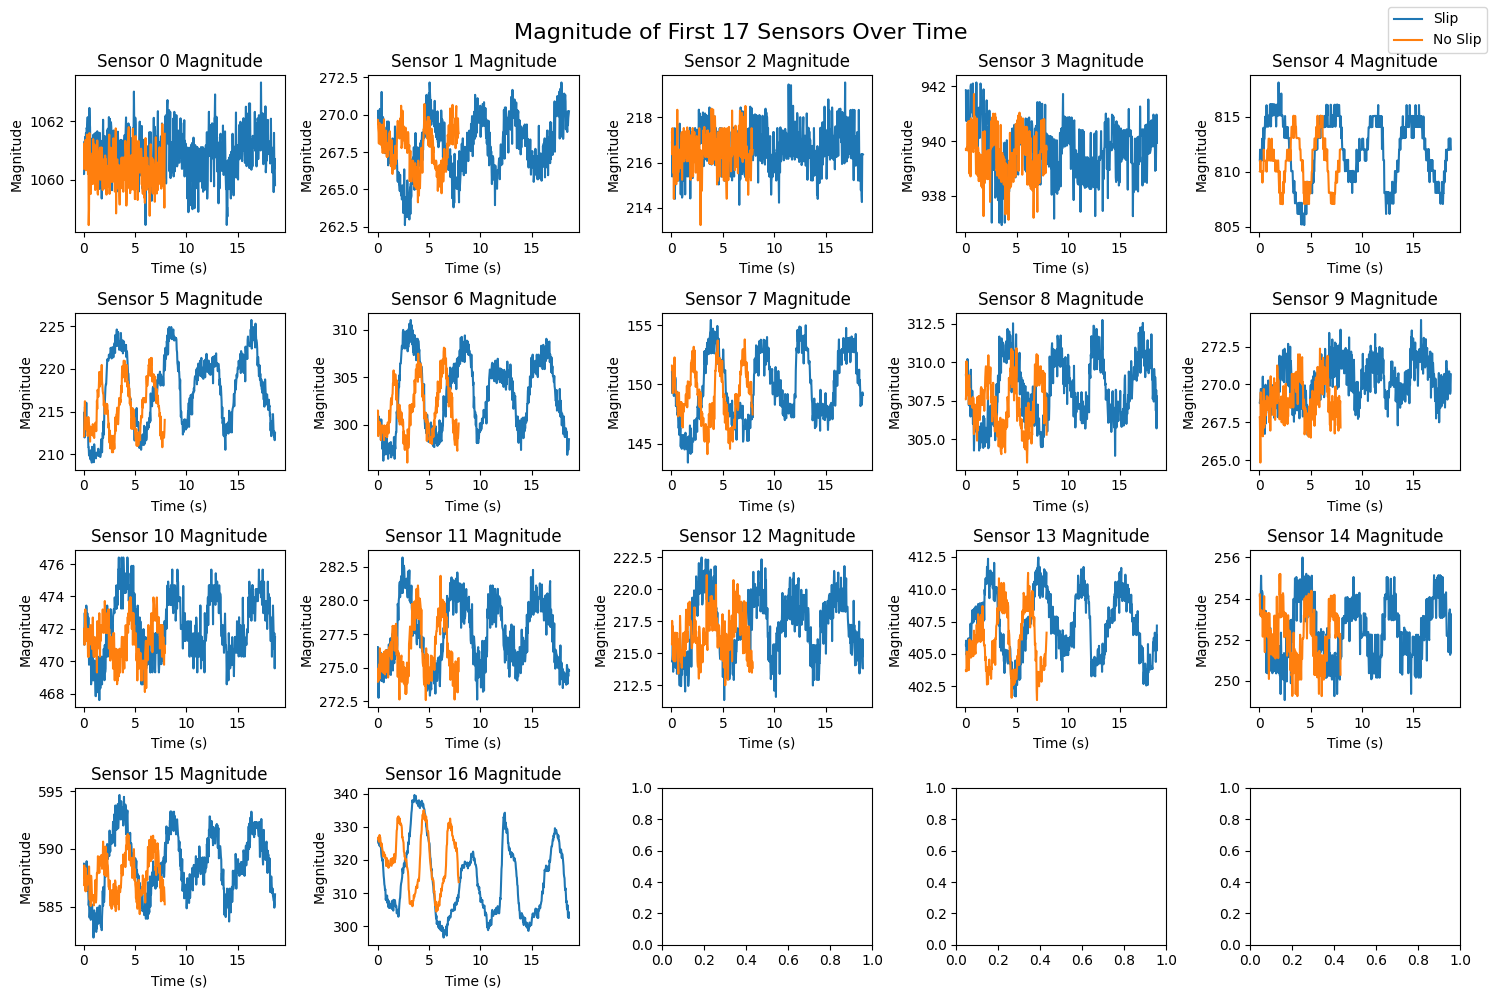

In [9]:
# -------------------------------- Slip sensor ------------------------------- #
#Take the first 51 channels
data_slip_51 = data_slip[:, :51]
print(data_slip_51.shape)

# every 3 channels are x,y,z of a sensor, so we can compute the magnitude
data_slip_magnitude = np.sqrt(np.sum(data_slip_51.reshape(-1, 17, 3)**2, axis=2))
print(data_slip_magnitude.shape)

# ------------------------------ no slip sensor ------------------------------ #
data_no_slip_51 = data_no_slip[:, :51]
data_no_slip_magnitude = np.sqrt(np.sum(data_no_slip_51.reshape(-1, 17, 3)**2, axis=2))

# ----------------------------------- Plot ----------------------------------- #
# Plot the magnitude of the first 17 sensors
fig, axs = plt.subplots(4, 5, figsize=(15, 10))
for j in range(17):
    ax = axs[j // 5, j % 5]
    ax.plot(time_slip, data_slip_magnitude[:, j])
    ax.plot(time_no_slip, data_no_slip_magnitude[:, j])
    ax.set_title(f'Sensor {j} Magnitude')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Magnitude')
#Add title to the figure
fig.suptitle('Magnitude of First 17 Sensors Over Time', fontsize=16)
fig.legend(['Slip', 'No Slip'], loc='upper right')
plt.tight_layout()
plt.show()